# Теоретический материал

## Эволюционные методы

Эволюционные методы.
<br>Эволюционные методы относятся к числу эффективных средств решения задач оптимизации и структурного синтеза проектных решений. Они основаны на использовании принципов оптимального приспособления организмов в живой природе к условиям окружающей среды. К числу эволюционных относятся методы генетические, колонии муравьев, поведения толпы. Наиболее развиты и востребованы в настоящее время генетические алгоритмы. По мере развития техники и технологий растет доля сложных задач проектирования и управления, для решения которых применение традиционных методов проблематично. Поэтому все большее внимание уделяется применению методов искусственного интеллекта. Генетические алгоритмы Для применения ГА необходимо:

1. Выделить совокупность свойств объекта, характеризуемых внутренними параметрами и влияющих на его полезность, т.е. выделить множество управляемых параметровX=(x_1,x_2,...,x_n) среди x_i могут быть величины различных типов (real, integer, Boolean, enumeration). Наличие нечисловых величин (enumeration) обусловливает возможность решения задач не только параметрической, но и структурной оптимизации;
2. Сформулировать количественную оценку полезности вариантов объекта — функцию полезности F. Если в исходном виде задача многокритериальна, то такая формулировка означает выбор скалярного (обобщенного) критерия;
3. Представить вектор X в форме хромосомы — записи следующего вида:

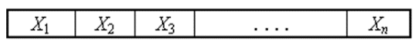

Этапы генетического алгоритма могут быть представлены в следующем виде:
<br>for (k=0; k<G; k++)
<br>&nbsp;&nbsp;&nbsp;&nbsp;{ for (j=0; j<N; j++)
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;{ Выбор родительской пары хромосом;
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Кроссовер;
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Мутации;
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Оценка функции полезности F потомков;
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Селекция;
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;}
<br>&nbsp;&nbsp;&nbsp;&nbsp;Замена текущего поколения новым;
<br>}

## Задание

Выполните по вариантам соответственно реализацию генетического алгоритма в соответствии с приложенными начальными данными.

In [1]:
# Функция качества хромосомы
def qZ(x, y):
    return (x + 3 * y) / (x ** 2 + y ** 2 + 1)

# Сумма качества хромосом
def qSumZ(Z):
    return sum(Z)

def exchangeScheme(oldX, oldY, sortedId):
    x = [0 for i in range(4)]
    y = [0 for i in range(4)]
    
    x[2] = oldX[sortedId[2]]
    x[3] = oldX[sortedId[2]]
    
    x[0] = oldX[sortedId[0]]
    
    x[1] = oldX[sortedId[1]]
    
    y[0] = oldY[sortedId[2]]
    y[1] = oldY[sortedId[2]]
    
    y[2] = oldY[sortedId[0]]
    
    y[3] = oldY[sortedId[1]]
    
    return x, y

def sorting(Z):
    sortedId = sorted(range(len(Z)), key=lambda k: Z[k])
    return sortedId

# Шаг эволюции
def evoStep(x, y, z):
    _, minId = min((value, id) for (id, value) in enumerate(z))
    x = x[:]
    y = y[:]
    z = z[:]
    
    x.pop(minId)
    y.pop(minId)
    z.pop(minId)
    
    return x, y, z

# Шаги эволюции (конечная функция), по умолчанию 4 шага
def evoSteps(x, y, steps_num=4):
    results = []
    
    for i in range(steps_num):
        arrZ = [qZ(k, y[i]) for i, k in enumerate(x)]
        
        x, y, z = evoStep(x, y, arrZ)
        
        x, y = exchangeScheme(x, y, sorting(z))
        
        results.append([x, y, qSumZ(arrZ), arrZ])
    
    return x, y, results

# Объявление массивов хромосом
x = [-5, -3, -2, -1]
y = [-1, -2, 0, 1]

results = evoSteps(x, y)

for i in range(len(results[2])):
    print(f'max_{i + 1}_step: {results[2][i][2]}')

qualityArrZ = []
for i in range(len(results[2])):
    qualityArrZ += results[2][i][3]

print(f'max Z: {max(qualityArrZ)}')

max_1_step: -0.6724867724867726
max_2_step: -1.7407407407407407
max_3_step: 0.35925925925925917
max_4_step: 1.4259259259259258
max Z: 0.6666666666666666


# Теоретический материал

## Метод имитации отжига

Алгоритм отжига – это метод оптимизации, который называется отжигом, или симуляцией восстановления (Simulated annealing). Как ясно из названия, метод поиска моделирует процесс восстановления. Восстановление – это физический процесс, который заключается в нагреве и последующем контролируемом охлаждении субстанции. В результате получается прочная кристаллическая структура, которая отличается от структуры с дефектами, образующейся при быстром беспорядочном охлаждении. Структура здесь представляет собой кодированное решение, а температура используется для того, чтобы указать, как и когда будут приниматься новые решения.
<br>Алгоритм имитации отжига включает следующие этапы:

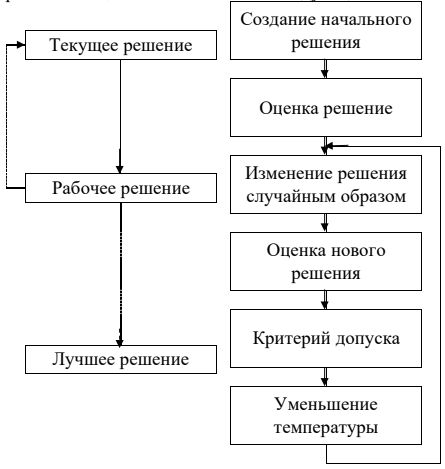

Метод отжига может быть эффективным при решении задач различных классов, требующих оптимизации. Ниже  приводится их краткий список:

1. создание пути;
2. реконструкция изображения;
3. назначение задач и планирование;
4. размещение сети;
5. глобальная маршрутизация;
6. обнаружение и распознавание визуальных объектов;
7. разработка специальных цифровых фильтров.

Поскольку метод отжига представляет собой процесс генерации случайных чисел, поиск решения с использованием данного алгоритма может занять значительное время. В некоторых случаях алгоритм вообще не
находит решение или выбирает не самое оптимальное. Алгоритм отжига как способ выполнения процедур поиска и оптимизации. Данный метод является аналогом процесса нагревания тела до состояния плавления с последующим постепенным охлаждением. При высоких температурах поиск ведется по всему диапазону. При снижении температуры диапазон поиска уменьшается до небольшой области вокруг текущего решения.
<p>Рассмотрим решение задачи поиска оптимального маршрута на графе методом имитации отжига Для этого, представим формальную постановку задачи и рассмотрим пример, который иллюстрирует алгоритм решения.

Итак, необходимо Найти длину гамильтонова цикла S4 в полном графе K_6 после четырех циклов решения задачи методом отжига. Даны расстояния L_(i,j) между вершинами. Даны также: начальная последовательность вершин L_0, последовательность замен вершин Z и выпавшие при этом вероятности перехода P_k, k = 1, . . . , 4.
<br>Переход на худшее (∆S_k = S_k − S_(k−1) > 0) решение допустим, если P_∗ = 100 где снижение температуры происходит по закону T_(k+1) = 0.5T_k от T_1 = 100.

## Задание

Найти длину гамильтонова цикла S4 в полном графе K6 после четырех циклов решения задачи методом отжига по вариантам ниже.

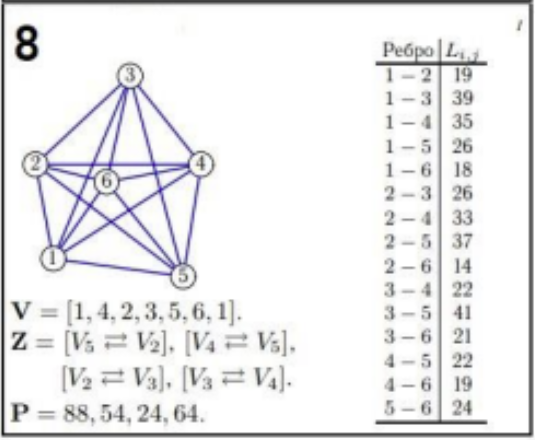

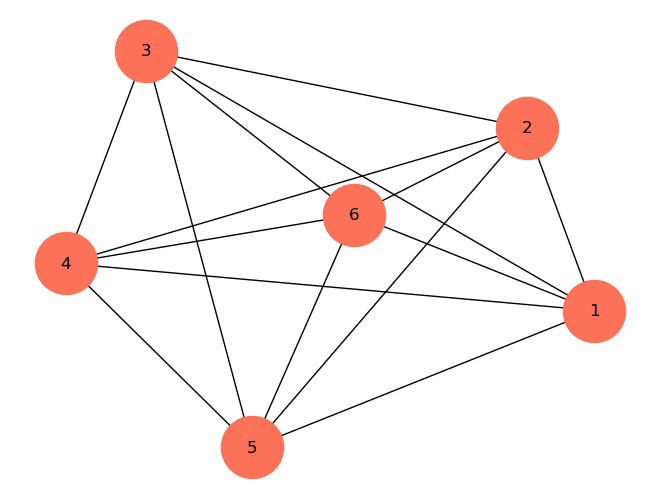

In [3]:
import networkx as nx
from math import e

distances = [(1, 2, 19),
            (1, 3, 39),
            (1, 4, 35), 
            (1, 5, 26),
            (1, 6, 18),
            (2, 3, 26),
            (2, 4, 33),
            (2, 5, 37),
            (2, 6, 14),
            (3, 4, 22),
            (3, 5, 41),
            (3, 6, 21),
            (4, 5, 22),
            (4, 6, 19),
            (5, 6, 24)] # Длины рёбер

V = [1, 4, 2, 3, 5, 6, 1] # Последовательность прохождения маршрута
Z = [(5, 2),
    (4, 5),
    (2, 3),
    (3, 4)] # Последовательность замен вершин
P = [88, 54, 24, 64] # Случайные числа, выпавшие в процессе счёта

T = 100 # Начальная температура

# Функция вероятности
def probability(delta, T):
    return 100 * e ** (-delta / T)

# Функция изменения температуры
def reductTemp(prevT):
    nextT = .5 * prevT
    return nextT

graph = nx.Graph() # Создание пустого графа
graph.add_weighted_edges_from(distances) # Добавление весов рёбер

# Отрисовка графа с заданными вершинами
nx.draw_kamada_kawai(graph, node_color='#fb7258', node_size=2000, with_labels=True)

Лучший выбранный маршрут: [1, 2, 5, 4, 3, 6, 1]
Длина лучшего выбранного маршрута: 139
Длины всех рассмотренных маршрутов: [177, 148, 157, 139, 154]


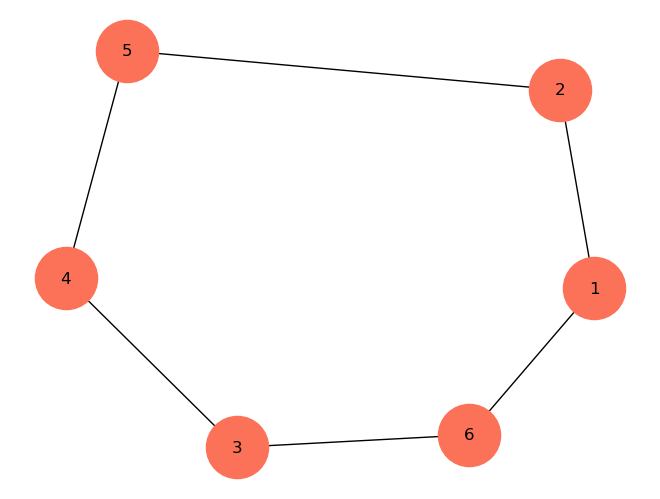

In [5]:
# Вычисление длины ребра
def edgeLength(i, j, distances, roundTrip=True):
    if roundTrip:
        return max([(item[2] if (item[0] == i and item[1] == j) or (item[1] == i and item[0] == j) else -1)
                   for item in distances])
    else:
        return max([(item[2] if (item[0] == i and item[1] == j) else -1) for item in distances])

# Вычисление длины маршрута
def routeLength(V, distances):
    edges = []
    
    for i in range(len(V) - 1):
        edges.append(edgeLength(V[i], V[i + 1], distances))
    
    return sum(edges)

# Одна перестановка в пути
def routeOneReplacement(arrV, Z, replacementByName=True):
    decrement = 1 if replacementByName else 0
    
    arrV[Z[0] - decrement], arrV[Z[1] - decrement] = arrV[Z[1] - decrement], arrV[Z[0] - decrement]
    
    return arrV

# Перестановка в пути
def routeReplacement(V, Z):
    for z in Z:
        V = routeOneReplacement(V, z)
    return V

# Выбор нужного пути методом отжига
def chooseRoute(distances, V, Z, T, P):
    sumLength = routeLength(V, distances) # Нахождение длины пути
    arrSum = [sumLength] # Массив сумм длин
    
    # Циклы методом отжига
    for i in range(len(Z)):
        newV = routeOneReplacement(V[:], Z[i]) # Новый маршрут после перестановки
        newS = routeLength(newV, distances) # Длина нового маршрута
        arrSum.append(newS)
        deltaS = newS - sumLength # Разница между длиной нового и старого маршрутов
        
        # В случае, если разница между длинами больше 0, то вычисляется вероятность
        if deltaS > 0:
            p = probability(deltaS, T) #подсчёт вероятности
            
            # Если заданная вероятность попадает в интервал от 0 до p, то новый маршрут выбирается
            if p > P[i]:
                V = newV
                sumLength = newS
        else:
            V = newV
            sumLength = newS
            
        T = reductTemp(T) # Вычисление температуры
    
    return V, arrSum

# Отрисовка графа по заданному маршруту
def drawRouteGraph(distances, bestRoute):
    newDistances = []
    # Прохождение по вектору
    for i in range(len(bestRoute) - 1):
        for distance in distances:
            if distance[0] == bestRoute[i] and distance[1] == bestRoute[i + 1] or distance[1] == bestRoute[i] and distance[0] == bestRoute[i + 1]:
                newDistances.append(distance)
    
    graph = nx.Graph() # Создание пустого графа
    
    graph.add_weighted_edges_from(newDistances) # Добавление весов рёбер
    # Отрисовка графа с заданными вершинами
    nx.draw_kamada_kawai(graph, node_color='#fb7258', node_size=2000, with_labels=True)

bestRoute, arrLength = chooseRoute(distances, V, Z, T, P)

print(f'Лучший выбранный маршрут: {bestRoute}')
print(f'Длина лучшего выбранного маршрута: {routeLength(bestRoute, distances)}')
print(f'Длины всех рассмотренных маршрутов: {arrLength}')

drawRouteGraph(distances, bestRoute) # Отрисовка лучшего маршрута